In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [127]:
df = pd.read_csv('mymoviedb (4).csv', lineterminator = '\n')

In [128]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2447 entries, 0 to 2446
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       2447 non-null   object 
 1   Title              2447 non-null   object 
 2   Overview           2447 non-null   object 
 3   Popularity         2447 non-null   float64
 4   Vote_Count         2447 non-null   int64  
 5   Vote_Average       2447 non-null   float64
 6   Original_Language  2447 non-null   object 
 7   Genre              2447 non-null   object 
 8   Poster_Url         2447 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 172.2+ KB


In [130]:
df['Genre'].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [131]:
df.duplicated().sum()

np.int64(0)

In [132]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,2447.000000,2447.000000,2447.000000
mean,101.913947,3146.480180,6.625868
std,206.080884,4313.779159,1.102282
min,35.266000,0.000000,0.000000
25%,43.347500,227.000000,6.100000
50%,57.705000,1298.000000,6.700000
75%,92.618000,4559.000000,7.300000
max,5083.954000,31077.000000,9.100000


Exploration Summary

We have a dataframe consisting of 2446 rows and 9 columns.
Our dataset looks a bit tidy with no NaNs nor duplicated values.
Release_Date column needs to be casted into date time and to extract only the year value. 
Overview, Original_Language and Poster-Url wouldn't be so useful during analysis, so we'll drop them.
There is noticeable outliers in popularity column.
Vote_Average better be categorisrd for proper analysis. 
Genre column has comma seperated values and white spaces that needs to be handled and casted into category. 

In [104]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])
print(df['Release_Date'].dtypes)

datetime64[ns]


In [105]:
df['Release_Date']= df['Release_Date'].dt.year
df['Release_Date'].dtype

dtype('int32')

In [106]:
def categorize_col(df, col, labels):
    edges = [df[col].describe()['min'],
             df[col].describe()['25%'],
              df[col].describe()['50%'],
              df[col].describe()['75%'],
              df[col].describe()['max']]
    df [col] = pd.cut(df[col], edges, labels = labels )
    return df
             

In [133]:
labels = ['not_popular', 'below_avg', 'average' , 'popular']
categorize_col(df, 'Vote_Average',labels)
df['Vote_Average'].unique()

['popular', 'below_avg', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']

In [108]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


In [109]:
df['Vote_Average'].value_counts()

Vote_Average
average        1756
popular        1697
below_avg      1688
not_popular    1572
Name: count, dtype: int64

Categorising Genre

In [110]:
df['Genre'] = df['Genre'].str.split(', ')
df = df.explode('Genre').reset_index(drop = True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


In [ ]:
cols = ['Overview','Original_Language', 'Poster_Url']

In [64]:
df.drop(cols, axis = 1, inplace = True)
df.columns

Index(['index', 'Release_Date', 'Title', 'Popularity', 'Vote_Count',
       'Vote_Average', 'Genre'],
      dtype='object')

In [126]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


In [125]:
#casting column into category
df['Genre'] = df['Genre'].astype('category')
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6713 entries, 0 to 6712
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  6713 non-null   int32   
 1   Title         6713 non-null   object  
 2   Popularity    6713 non-null   float64 
 3   Vote_Count    6713 non-null   int64   
 4   Vote_Average  6713 non-null   category
 5   Genre         6713 non-null   object  
dtypes: category(1), float64(1), int32(1), int64(1), object(2)
memory usage: 242.9+ KB


In [123]:
df.nunique()

Release_Date      74
Title           2378
Popularity      2379
Vote_Count      1835
Vote_Average       4
Genre             19
dtype: int64

In [121]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


In [120]:
df.dropna(inplace=True)
df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [119]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


##  Data  Visualization

In [74]:
sns.set_style('whitegrid')

#### Most Frequent Movie Genre

In [118]:
df['Genre'].describe()

count       6713
unique        19
top       Action
freq         857
Name: Genre, dtype: object

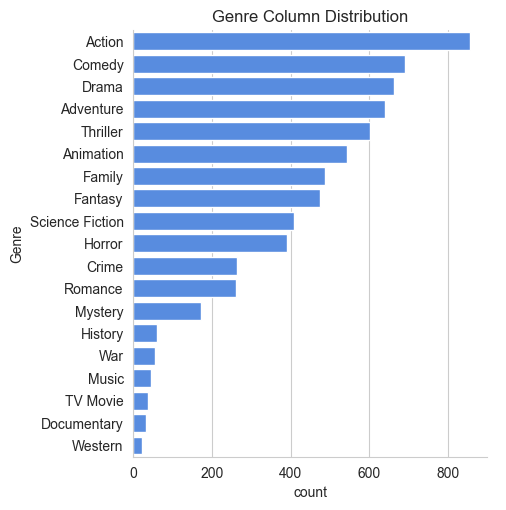

In [117]:
sns. catplot(y = 'Genre', data = df , kind = 'count',order = df['Genre'].value_counts(). index,color = '#4287f5')
plt.title('Genre Column Distribution')
plt.show()

#### Highest Vote in Vote average column

In [116]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


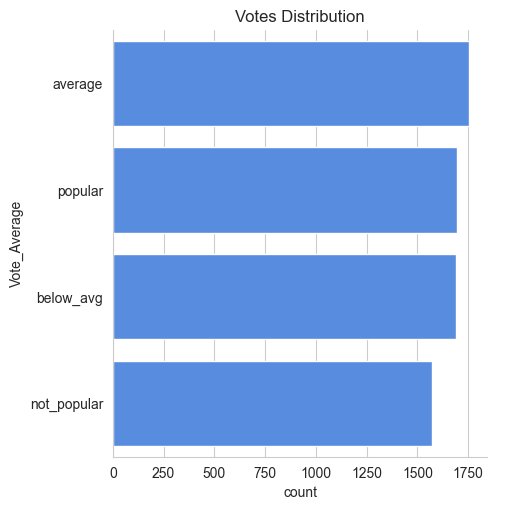

In [115]:
sns.catplot(y='Vote_Average', data = df, kind = 'count', order = df['Vote_Average'].value_counts().index, color= '#4287f5')
plt.title('Votes Distribution')
plt.show()

#### Highest Popular Movie and Its Genre

In [ ]:
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


#### Lowest Popular Movie and its Genre

In [ ]:
df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
6709,1991,An American Tail: Fievel Goes West,35.266,588,below_avg,Adventure
6710,1991,An American Tail: Fievel Goes West,35.266,588,below_avg,Animation
6711,1991,An American Tail: Fievel Goes West,35.266,588,below_avg,Family
6712,1991,An American Tail: Fievel Goes West,35.266,588,below_avg,Western


#### Year with most filmed movies

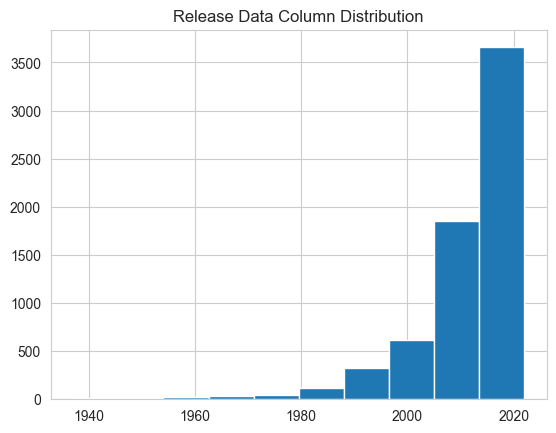

In [112]:
df['Release_Date'].hist()
plt.title('Release Data Column Distribution')
plt.show()

Conclusion
Q1 What is most frequent genre in the dataset?
Action genre is the most frequent in our dataset and has appeared most of the times among 19 other genres.

Q2 What genres has highest votes?
We have our dataset with popular vote (8940 rows). Action again gets the highest popularity among fans by being having more votes than other movies.

Q3 What movies got the highest popularity? What's its genre?
Spider-Man : No Way Home has the highest popularity rate in our datasetand it has genres of Action, Adventure and Science Fiction.

Q4 What movie got the lowest popularity ? What's its genre?
An American Tail: Fievel Goes West has the lowest rate in our dataset and it has genre of Adventure, Animation, Family and Western.

Q5 Which year has the most filmed movies?
Year 2020 has the most filmed movies.

